In [1]:
!pip install gdown
!gdown --id 1HdLnARwbbD7yubC1d0gvvZJIrwKLd5Z3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HdLnARwbbD7yubC1d0gvvZJIrwKLd5Z3
To: /content/retail_raw_reduced_data_quality.csv
100% 363k/363k [00:00<00:00, 5.90MB/s]


In [5]:
!pip install ydata-profiling # Install the correct package name: ydata-profiling
import pandas as pd
import numpy as np
import ydata_profiling as pandas_profiling # Import using the alias for compatibility
import io
retail_raw = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0bf39c4dba3b043149f39afcbb4e32e7aac9d7ff9845fe7b26b7c9a739518ac0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


#Descriptive Statistics — Part 1

In [6]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


#Descriptive Statistics — Part 2

In [7]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom count_city: 4984
Count kolom product_id: 4989


#Descriptive Statistics — Part 3

In [8]:
# Kolom city
length_city = len(retail_raw['city'])
count_city = retail_raw['city'].count()
# Kolom product id
length_product_id = len(retail_raw['product_id'])
count_product_id = retail_raw['product_id'].count()

# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
ratio_of_missing_values_city = number_of_missing_values_city/length_city
pct_of_missing_values_city = '{0:.1f}%'.format(ratio_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
ratio_of_missing_values_product_id = number_of_missing_values_product_id/length_product_id
pct_of_missing_values_product_id = '{0:.1f}%'.format(ratio_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


#Descriptive Statistics — Part 4

In [9]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
Name: quantity, dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


#Descriptive Statistics — Part 5

In [10]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


#Descriptive Statistics — Part 6

Tugas 7. Menampilkan korelasi data

In [11]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


In [14]:
import ydata_profiling
retail_raw_profile = pandas_profiling.ProfileReport(retail_raw)
retail_raw_profile.to_file('retail_raw_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Tugas 10. Membuang outliers kolom quantity

In [15]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4541, 9)


# Tugas 12. Membuang duplikasi data
Membuang duplikasi data dari dataset retail_raw.

In [16]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4541, 9)
Shape akhir:  (4535, 9)


<ipython-input-16-d14f92c03fe7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_raw.drop_duplicates(inplace=True)


#Tugas 13. Data Profiling

In [17]:
!gdown --id 1cHrB8pctygbO0aHcvRnAWwZdHOQWitYD

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cHrB8pctygbO0aHcvRnAWwZdHOQWitYD
To: /content/uncleaned_raw.csv
100% 36.9k/36.9k [00:00<00:00, 18.7MB/s]


In [18]:

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('/content/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100)

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


#Tugas 14. Data Cleansing

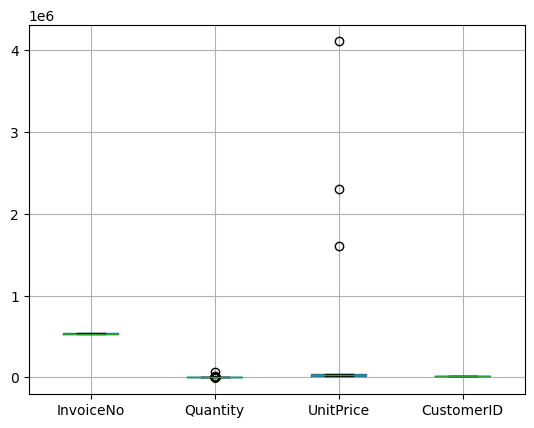

In [25]:
import matplotlib.pyplot as plt

plt.style.use('default')

uncleaned_raw = pd.read_csv('/content/uncleaned_raw.csv')
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

#Tugas 15. Data Cleansing

In [26]:

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


#Tugas 16. Profiling otomatis

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


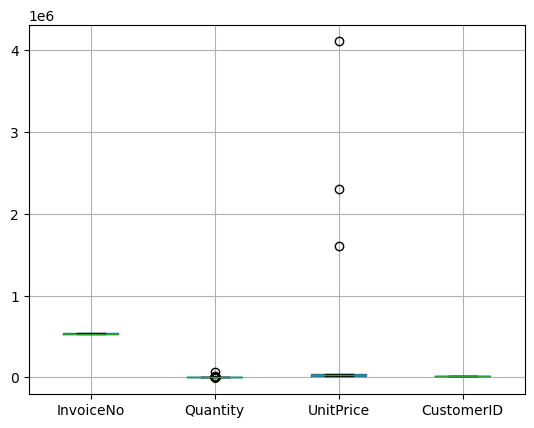

Data yang duplikat:
6


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import ydata_profiling

# Membaca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('/content/uncleaned_raw.csv')

# Inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
print(uncleaned_raw.head())

# Check kolom yang mengandung missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())

# Persentase missing value untuk kolom Quantity
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
number_of_missing_values_qty = length_qty - count_qty
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100)
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

# Mengisi missing value dengan mean dari kolom Quantity
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

# Mengetahui kolom yang memiliki outliers menggunakan boxplot
plt.style.use('default')
uncleaned_raw.boxplot()
plt.show()

# Menghitung IQR untuk kolom UnitPrice
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outliers dari kolom UnitPrice
uncleaned_raw = uncleaned_raw[~((uncleaned_raw['UnitPrice'] < (Q1 - 1.5 * IQR)) | (uncleaned_raw['UnitPrice'] > (Q3 + 1.5 * IQR)))]

# Memeriksa duplikasi
print('Data yang duplikat:')
print(uncleaned_raw.duplicated().sum())

# Menghapus duplikasi
uncleaned_raw = uncleaned_raw.drop_duplicates()

# Membuat laporan profil data menggunakan ydata_profiling
uncleaned_raw_profile = ydata_profiling.ProfileReport(uncleaned_raw)
uncleaned_raw_profile.to_file('uncleaned_raw_report.html')
